In [197]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


In [254]:
df=pd.read_csv('data/train.csv',usecols=['Id','OverallQual','LotArea','1stFlrSF','2ndFlrSF','GrLivArea', 'TotalBsmtSF','SalePrice'])

In [255]:
df.head()

,Id,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,SalePrice
0,1,8450,7,856,856,854,1710,208500
1,2,9600,6,1262,1262,0,1262,181500
2,3,11250,7,920,920,866,1786,223500
3,4,9550,7,756,961,756,1717,140000
4,5,14260,8,1145,1145,1053,2198,250000


In [256]:
df['logSalePrice']=np.log(df.loc[:,'SalePrice'])

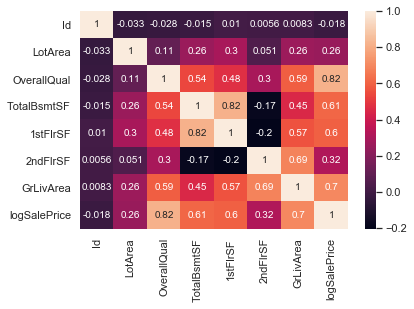

In [257]:
sns.heatmap(df.drop('SalePrice',axis=1).corr(),annot=True)

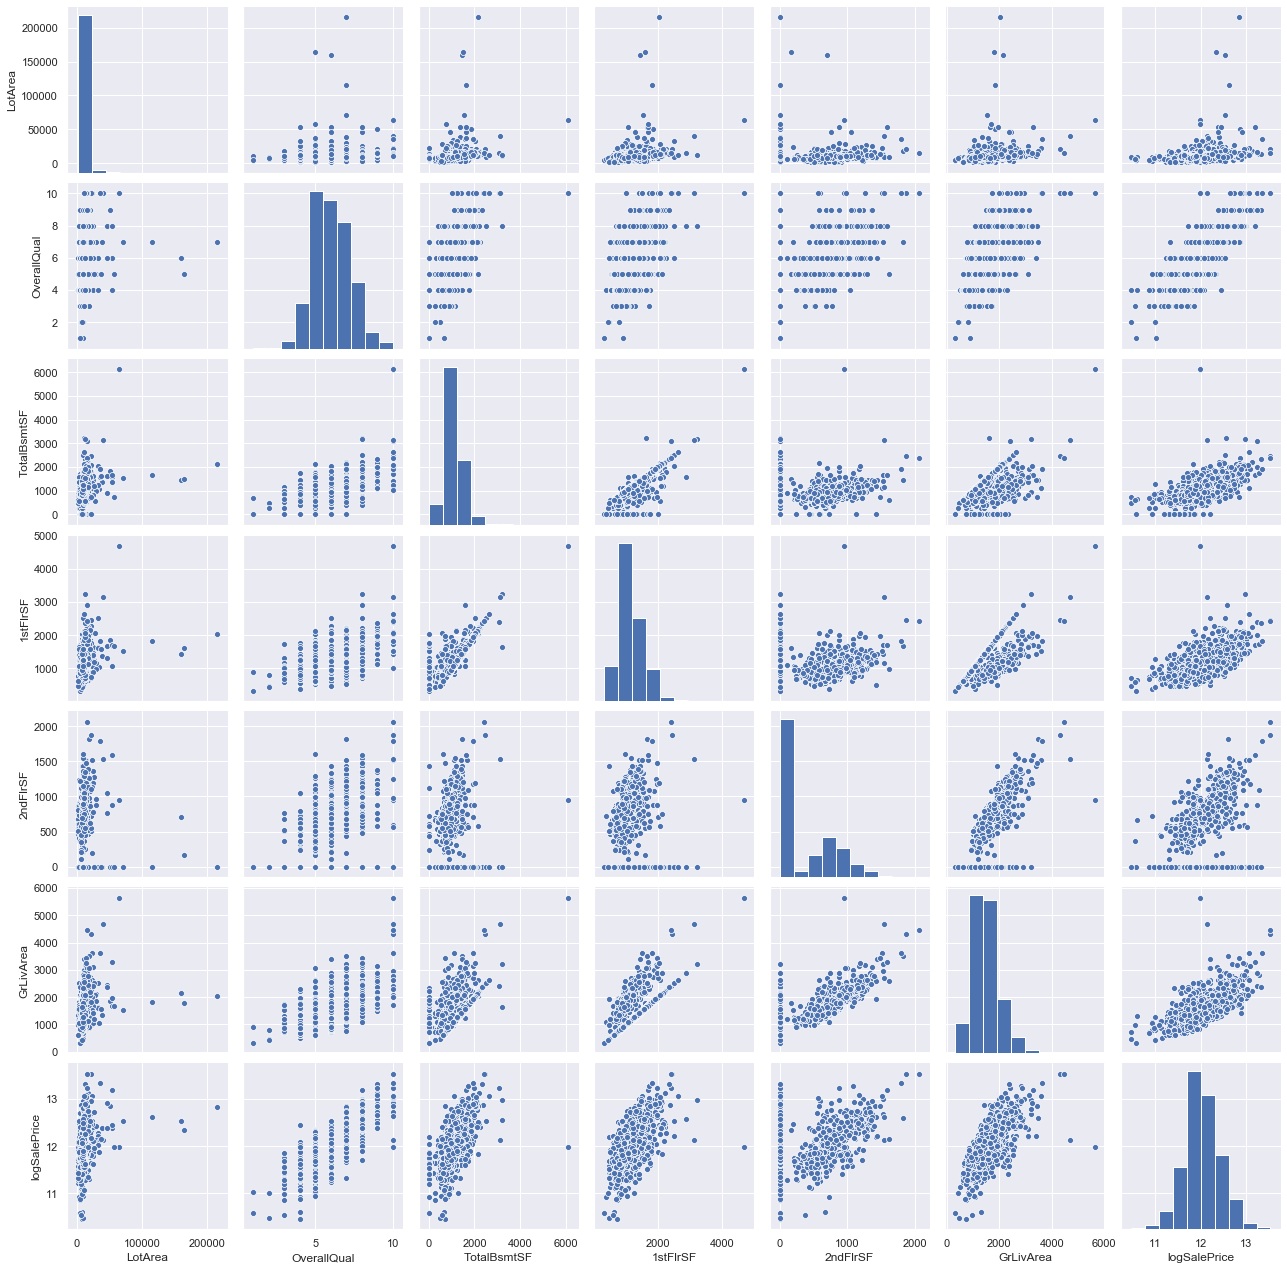

In [258]:
sns.pairplot(df.drop(['SalePrice','Id'],axis=1))

In [259]:
df.columns

Index(['Id', 'LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'SalePrice', 'logSalePrice'],
      dtype='object')

In [360]:
df_model=df[['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'logSalePrice']]

In [361]:
df_model.head(3)

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,logSalePrice
0,8450,7,856,856,854,1710,12.247694
1,9600,6,1262,1262,0,1262,12.109011
2,11250,7,920,920,866,1786,12.317167


In [362]:
df_model.corr()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,logSalePrice
LotArea,1.000000,0.105806,0.260833,0.299475,0.050986,0.263116,0.257320
OverallQual,0.105806,1.000000,0.537808,0.476224,0.295493,0.593007,0.817184
TotalBsmtSF,0.260833,0.537808,1.000000,0.819530,-0.174512,0.454868,0.612134
1stFlrSF,0.299475,0.476224,0.819530,1.000000,-0.202646,0.566024,0.596981
2ndFlrSF,0.050986,0.295493,-0.174512,-0.202646,1.000000,0.687501,0.319300
GrLivArea,0.263116,0.593007,0.454868,0.566024,0.687501,1.000000,0.700927
logSalePrice,0.257320,0.817184,0.612134,0.596981,0.319300,0.700927,1.000000


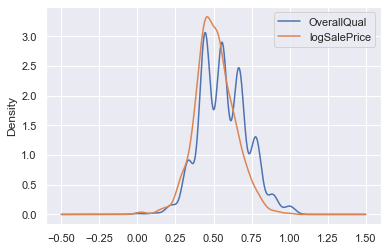

In [320]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df_model)

df_model = pd.DataFrame(data_tf,columns=['OverallQual', 'logSalePrice'])
df_model.plot.kde()

In [363]:

X = df_model.iloc[:, :-1].values
y = df_model.iloc[:, -1].values

In [364]:
X

array([[ 8450,     7,   856,   856,   854,  1710],
       [ 9600,     6,  1262,  1262,     0,  1262],
       [11250,     7,   920,   920,   866,  1786],
       ...,
       [ 9042,     7,  1152,  1188,  1152,  2340],
       [ 9717,     5,  1078,  1078,     0,  1078],
       [ 9937,     5,  1256,  1256,     0,  1256]])

In [365]:
y

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

In [372]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [388]:
reg = DecisionTreeRegressor(min_samples_split=6,max_depth=10,min_samples_leaf=10).fit(X_train,y_train)

In [389]:
reg.score(X_train,y_train)

0.852641531776534

In [390]:
reg.score(X_test,y_test)

0.7746917783365561

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [329]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
regressor.score(X_train,y_train)

0.6516812037800828

In [331]:
regressor.score(X_test,y_test)

0.7021079212845341

In [332]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
regressor_model = LinearRegression()
regressor_model.fit(X, y)
print(cross_val_score(regressor_model,X, y,cv=10).mean())

0.6639538603528913


In [342]:
X[0:9]

array([[0.66666667],
       [0.55555556],
       [0.66666667],
       [0.66666667],
       [0.77777778],
       [0.44444444],
       [0.77777778],
       [0.66666667],
       [0.66666667]])

In [353]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 100,interaction_only=False)
X_poly = poly_reg.fit_transform(X)

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)


In [355]:
X_train[0:9]

array([[1.00000000e+00, 8.88888889e-01, 7.90123457e-01, 7.02331962e-01,
        6.24295077e-01, 5.54928957e-01, 4.93270184e-01, 4.38462386e-01,
        3.89744343e-01, 3.46439416e-01, 3.07946148e-01, 2.73729909e-01,
        2.43315475e-01, 2.16280422e-01, 1.92249264e-01, 1.70888235e-01,
        1.51900653e-01, 1.35022803e-01, 1.20020269e-01, 1.06684684e-01,
        9.48308299e-02, 8.42940710e-02, 7.49280631e-02, 6.66027228e-02,
        5.92024202e-02, 5.26243735e-02, 4.67772209e-02, 4.15797519e-02,
        3.69597795e-02, 3.28531373e-02, 2.92027887e-02, 2.59580344e-02,
        2.30738084e-02, 2.05100519e-02, 1.82311572e-02, 1.62054731e-02,
        1.44048650e-02, 1.28043244e-02, 1.13816217e-02, 1.01169971e-02,
        8.99288629e-03, 7.99367670e-03, 7.10549040e-03, 6.31599147e-03,
        5.61421464e-03, 4.99041301e-03, 4.43592268e-03, 3.94304238e-03,
        3.50492656e-03, 3.11549028e-03, 2.76932469e-03, 2.46162195e-03,
        2.18810840e-03, 1.94498524e-03, 1.72887577e-03, 1.536778

In [356]:
from sklearn.linear_model import Lasso
regressor = Lasso(0.0001)
regressor.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [357]:
regressor.score(X_train,y_train)

0.6625677603961069

In [358]:
regressor.score(X_test,y_test)

0.7049510129155283

In [359]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
regressor_model = Lasso(alpha=0.001)
regressor_model.fit(X_poly, y)
print(cross_val_score(regressor_model,X_poly, y,cv=10).mean())

0.6604568421987811


In [30]:
# plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('SalePrice vs area (Training set)')
# plt.xlabel('area')
# plt.ylabel('SalePrice')
# plt.show()

In [31]:
# plt.scatter(X_test, y_test, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('SalePrice vs area (Training set)')
# plt.xlabel('area')
# plt.ylabel('SalePrice')
# plt.show()